<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="homework.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Take-Home <br>(Week 1)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### Import the required libraries

In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')
 
# import functions to perform scaling and normalization
from sklearn.preprocessing import MinMaxScaler

# import various functions from sklearn 
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans

In [2]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

#### Read the data

Load the csv file and print the first five observations.

In [3]:
# read the data
df_retail = pd.read_csv("wholesale_cust.csv")

# display the first five rows of the data
df_retail.head()

,Region,Vegetables,Personal_care,Milk,Grocery,Plasticware
0,Rochester,12667,2674,9656,7561,212
1,Rochester,7058,3293,9810,9568,1757
2,Rochester,6346,3516,8808,7684,2408
3,Rochester,13251,507,1196,4221,6407
4,Rochester,22620,1777,5410,7198,3908


The dataset includes the yearly spendings (in dollars) of the retailers on the products purchased from the wholesale market. Our objective is to group the retailers based on their purchase. 

**The data definition is as follows:** <br>

**Region**:  City of the retailer

**Vegetables**: Annual spending on vegetables

**Personal_care**: Annual spending on personal care products

**Milk**: Annual spending on milk and milk products

**Grocery**: Annual spending on grocery

**Plasticware**: Annual spending on plasticware (container, bottles, dishes and so on)

### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Is there any retailer whose entry is recorded more than once? If yes, do the needful.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [4]:
# identify any duplicate records in the data
# find the row indices of the duplicate entries
df_retail[df_retail.duplicated() == True].index

Int64Index([30, 277, 317, 430, 443], dtype='int64')

The indices in the above output represents the duplicate records. Let us remove these observations from the original data.

In [5]:
# drop the duplicates
# ignore the row indexes using 'ignore_index = True'
df_retail = df_retail.drop_duplicates(ignore_index = True)

# check for the duplicates in the new dataframe 
df_retail.duplicated().value_counts()

False    439
dtype: int64

**Interpretation**: The above output shows that there are no duplicates in the data. And now there are 439 unique entries in the data.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Identify the different cities to which the retailers belong. Also, visualize their count in different cities.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [6]:
# use 'unique()' to identify the different cities in the data
df_retail.Region.unique()

array(['Rochester', 'Oneonta', 'Albany'], dtype=object)

The retailers are from 3 different cities. Now let us use the countplot to visualize the count of retailers in each city.

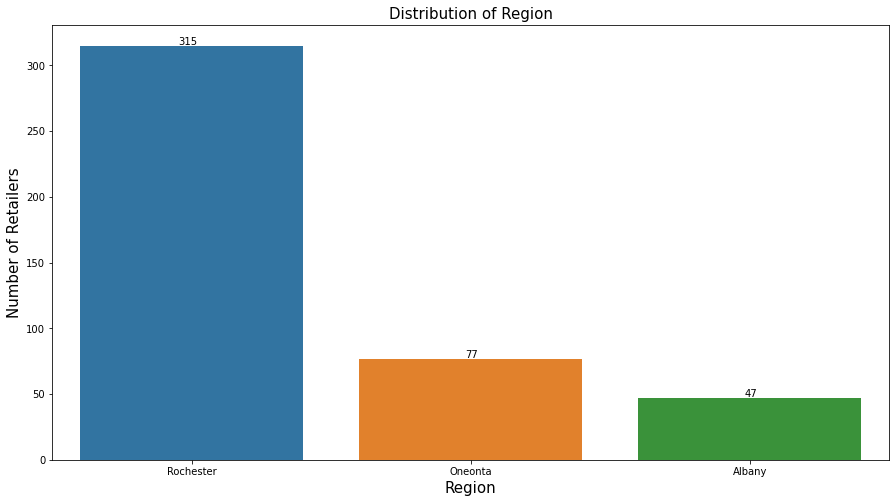

In [7]:
# use a countplot to plot the number of retailers for each region
sns.countplot(x = df_retail.Region)

# use below code to print the values in the graph
# 'x' and 'y' gives position of the text
# 's' is the text 
plt.text(x = -0.05, y = df_retail.Region.value_counts()[0] + 1, s = df_retail.Region.value_counts()[0])
plt.text(x = 0.98, y = df_retail.Region.value_counts()[1] + 1, s = df_retail.Region.value_counts()[1])
plt.text(x = 1.98, y = df_retail.Region.value_counts()[2] + 1, s = df_retail.Region.value_counts()[2])

# set plot and axes labels
# set text size using 'fontsize'
plt.title('Distribution of Region', fontsize = 15)
plt.xlabel('Region', fontsize = 15)
plt.ylabel('Number of Retailers', fontsize = 15)

# display the plot
plt.show()

**Interpretation**: The above plot shows that 315 retailers are from Rochester. The number of retailers from Albany is least.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Identify the extreme observations in the data using a visualization technique. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

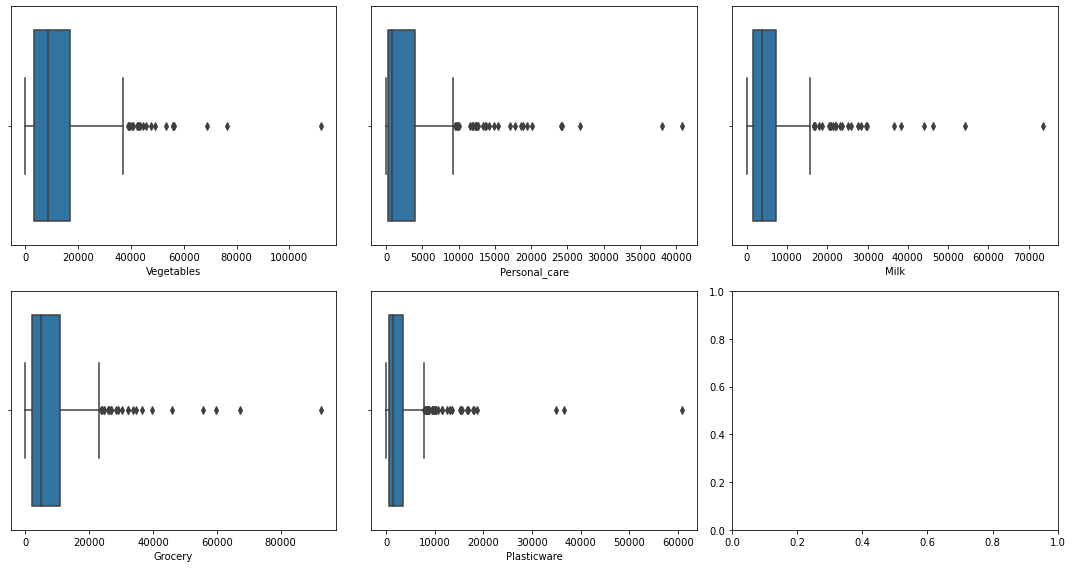

In [8]:
# consider the numeric variables
# remove the categorical variable 'Region'
df_num = df_retail.drop(['Region'], axis = 1)

# plot the boxplot for each numerical variable to identify the outliers
# set the number of rows in the subplot using the parameter, 'nrows'
# set the number of columns in the subplot using the parameter, 'ncols'
# 'figsize' sets the figure size
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize=(15, 8))

# use for loop to plot the boxplot for each variable
for variable, subplot in zip(df_num.columns, ax.flatten()):
    
    # use boxplot() to plot the graph
    # pass the axes for the plot to the parameter, 'ax'
    sns.boxplot(df_retail[variable], ax = subplot)

# adjust the subplots
plt.tight_layout()
  
# display the plot
plt.show()

**Interpretation**: The above boxplots show the presence of extreme observations in each of the variables.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Use the appropriate technique to remove the observations greater than 3*IQR above the third quartile.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

Here we use the IQR method to remove the data points greater than (third quartile + 3.IQR)

In [9]:
# calculate the first quartile
Q1 = df_retail.quantile(0.25)

# calculate the third quartile
Q3 = df_retail.quantile(0.75)

# The Interquartile Range (IQR) is defined as the difference between the third and first quartile
# calculate IQR for each numeric variable
IQR = Q3 - Q1

# retrieve the dataframe without the observations greater than Q3+3*IQR
# '~' returns the values that do not satisfy the given conditions 
# i.e. it returns values between the less than Q3+3*IQR
# 'any(axis=1)' checks the entire row for atleast one 'True' entry (those rows represents outliers in the data)
df_retail = df_retail[~(df_retail > (Q3 + 3 * IQR)).any(axis=1)]

# check the shape of the data
df_retail.shape

(406, 6)

**Interpretation**: The above output shows that 33 extreme outliers are removed from the data.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Transform the numerical variables such that the values will be between 0 and 1.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [10]:
# consider the numerical variables
num_var = df_retail.drop(['Region'], axis=1)

# initialize the MinMaxScaler
X_norm = MinMaxScaler()

# normalize all the columns of the dataframe 'num_var'
num_norm = X_norm.fit_transform(num_var)

# create a dataframe of normalized variables
# pass the required column names to the parameter 'columns'
X_scaled = pd.DataFrame(num_norm, columns = num_var.columns)

X_scaled.head()

,Vegetables,Personal_care,Milk,Grocery,Plasticware
0,0.225515,0.180011,0.409920,0.217163,0.018091
1,0.125632,0.221728,0.416472,0.274860,0.151822
2,0.112953,0.236757,0.373846,0.220699,0.208171
3,0.235914,0.033967,0.050028,0.121144,0.554315
4,0.402753,0.119558,0.229293,0.206727,0.338007


In [11]:
# check the min() and max() of each variable
print('Minimum: \n', X_scaled.min())

print('Maximum: \n', X_scaled.max())

Minimum: 
 Vegetables       0.0
Personal_care    0.0
Milk             0.0
Grocery          0.0
Plasticware      0.0
dtype: float64
Maximum: 
 Vegetables       1.0
Personal_care    1.0
Milk             1.0
Grocery          1.0
Plasticware      1.0
dtype: float64


**Interpretation**: The minimum and maximum value for each variable is 0 and 1 respectively. Thus we can say that all the variables have values between 0 and 1.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Perform K-Means clustering with varying K from 2 to 4, and identify the optimal number of clusters using the Silhouette plot.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

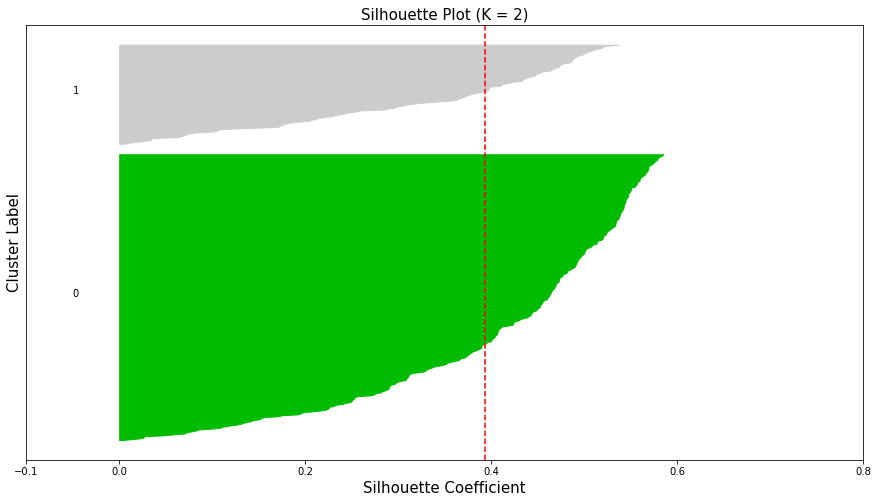

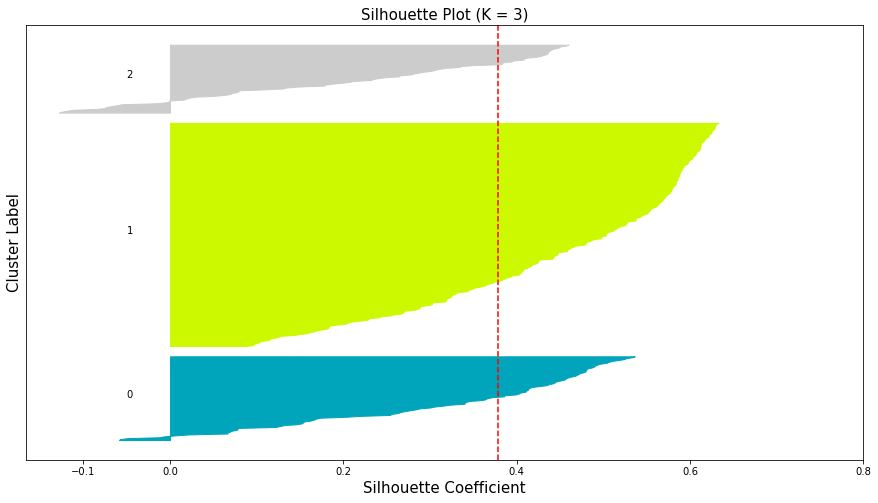

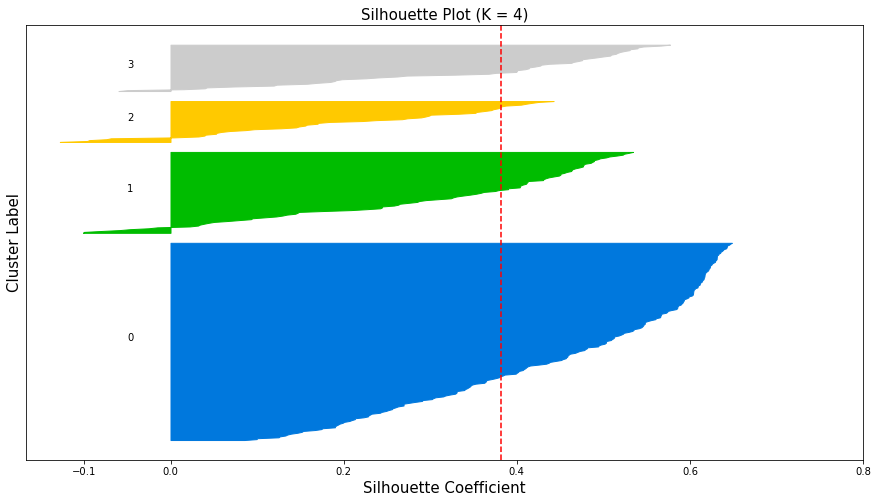

In [12]:
# consider different K values
n_clusters = [2, 3, 4]

# consider an array of the data
X_scaled = np.array(X_scaled)

# for each value of K, plot the silhouette plot
for K in n_clusters:
    
    # create a subplot with 1 row and 2 columns
    fig, ax = plt.subplots(1,1)
    
    # set the figure size
    fig.set_size_inches(15, 8)

    # initialize the cluster with 'K' value and a random generator
    model = KMeans(n_clusters = K, random_state = 10)
    
    # fit and predict on the scaled data
    cluster_labels = model.fit_predict(X_scaled)

    # the 'silhouette_score()' gives the average value for all the samples
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    
    # compute the silhouette coefficient for each sample
    sample_silhouette_values = silhouette_samples(X_scaled, cluster_labels)
    
    y_lower = 10
    for i in range(K):
        
        # aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        
        # sort the silhouette coefficient
        ith_cluster_silhouette_values.sort()
        
        # calculate the size of the cluster
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # color each cluster 
        color = cm.nipy_spectral(float(i+1) / K)
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color)

        # label the silhouette plots with their cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # compute the new y_lower for next plot
        y_lower = y_upper + 10 

    # plot the vertical line for average silhouette score of all the values
    # pass the required color and linestyle
    ax.axvline(x = silhouette_avg, color = "red", linestyle = "--")

    # clear the y-axis ticks
    ax.set_yticks([])  
    
    # set the ticks for x-axis 
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8])

    # set the axes and plot label
    # set the font size using 'fontsize'
    ax.set_title('Silhouette Plot (K = ' + str(K) + ')', fontsize = 15)
    ax.set_xlabel('Silhouette Coefficient', fontsize = 15)
    ax.set_ylabel('Cluster Label', fontsize = 15)
    
# display the plot
plt.show()

**Interpretation**: The plots show that for K = 3 and K = 4, there are outliers (observations with negative Silhouette coefficient) in some of the clusters. Thus we can not choose these values as the optimal number for creating the clusters. 

For K = 2, there are no outliers present; also, the Silhouette coefficients are greater than the average score. Thus, for this dataset, K = 2 is the optimal number of clusters.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Consider the numerical variables to create two clusters and visualize them using the variables 'Vegetables' and 'Personal_care'.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Let us perform K-Means clustering for K = 2 using the numerical variables.

In [13]:
# build a K-Means model with 2 clusters
# consider a 'random_state' for same centroid initialization for each code run 
clusters = KMeans(n_clusters = 2, random_state = 10)

# fit the model
clusters.fit(X_scaled)

# create a copy of the original dataframe
df_cluster = df_retail.copy()

# add the cluster labels as the new column in the dataframe
df_cluster['Cluster_id'] = clusters.labels_

Now, plot a scatter plot to visualize the two clusters using the variables `Vegetables` and `Personal_care`.

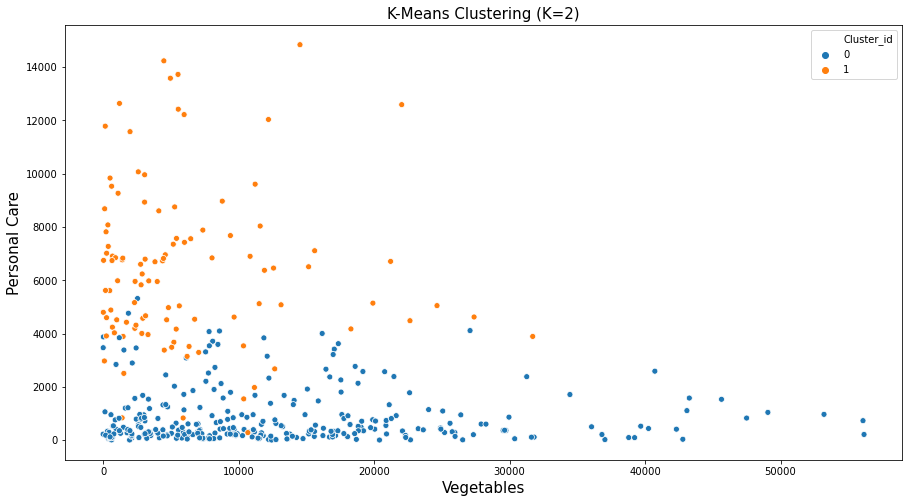

In [14]:
# plot a scatter plot
# pass the x and y axis to plot the data
# pass the hue parameter to create the clusters with different colors
sns.scatterplot(x = 'Vegetables', y = 'Personal_care', data = df_cluster, hue = 'Cluster_id')

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('K-Means Clustering (K=2)', fontsize = 15)
plt.xlabel('Vegetables', fontsize = 15)
plt.ylabel('Personal Care', fontsize = 15)

# display the plot
plt.show()

**Interpretation**: The above scatter plot shows that the majority of the retailers in the 1st cluster tends to deal in vegetables over personal care products. Some of the retailers are prone to buy the vegetables as well as personal care products.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Draw insights from the clusters formed in the previous question with respect to each variable in the data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In the previous question, we clustered the data into two groups. Now let us retrieve the clusters and interpret them.

#### Retrieve the 1st cluster

In [15]:
# check the number of observations in the 1st cluster
df_cluster[df_cluster['Cluster_id'] == 0].shape

(301, 7)

In [16]:
# use the 'describe()' to get the statistical summary of the numerical variables
df_cluster[df_cluster['Cluster_id'] == 0].describe()

,Vegetables,Personal_care,Milk,Grocery,Plasticware,Cluster_id
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.0
mean,12843.687708,852.249169,2963.335548,3719.053156,2659.521595,0.0
std,11175.894002,1032.337985,2457.159741,2779.975303,2647.164314,0.0
min,3.000000,3.000000,20.000000,7.000000,3.000000,0.0
25%,4420.000000,200.000000,1137.000000,1694.000000,778.000000,0.0
50%,9670.000000,409.000000,2182.000000,2856.000000,1651.000000,0.0
75%,18044.000000,967.000000,3965.000000,5119.000000,3746.000000,0.0
max,56159.000000,5316.000000,18664.000000,16966.000000,11556.000000,0.0


In [17]:
# use the 'describe(include = 'object')' to get the statistical summary of the categorical variable
df_cluster[df_cluster['Cluster_id'] == 0].describe(include = 'object')

,Region
count,301
unique,3
top,Rochester
freq,215


**Interpretation**: This cluster contains the records of 301 retailers out of which 71% are from Rochester. The above output shows that, majority of the retailers in this cluster are purchasing vegetables from the wholesaler. They are spending the least money on buying the personal care products.

#### Retrieve the 2nd cluster

In [18]:
# check the number of observations in the 2nd cluster
df_cluster[df_cluster['Cluster_id'] == 1].shape

(105, 7)

In [19]:
# use the 'describe()' to get the statistical summary of the numerical variables
df_cluster[df_cluster['Cluster_id'] == 1].describe()

,Vegetables,Personal_care,Milk,Grocery,Plasticware,Cluster_id
count,105.000000,105.000000,105.000000,105.000000,105.000000,105.0
mean,6129.904762,6440.114286,9818.219048,15270.495238,1451.885714,1.0
std,6478.159070,3016.213815,4437.085194,6073.861403,1521.581113,0.0
min,18.000000,282.000000,1266.000000,4748.000000,26.000000,1.0
25%,1420.000000,4424.000000,6721.000000,10908.000000,365.000000,1.0
50%,4456.000000,6236.000000,9232.000000,13586.000000,934.000000,1.0
75%,8797.000000,7677.000000,11991.000000,19805.000000,1998.000000,1.0
max,31708.000000,14841.000000,23527.000000,34792.000000,10156.000000,1.0


In [20]:
# use the 'describe(include = 'object')' to get the statistical summary of the categorical variable
df_cluster[df_cluster['Cluster_id'] == 1].describe(include = 'object')

,Region
count,105
unique,3
top,Rochester
freq,77


**Interpretation**: This cluster contains the records of 105 retailers out of which 73% are from Rochester. The above output shows that, majority of the retailers in this cluster are purchasing grocery along with the milk and milk products from the wholesaler. They are spending the least money on buying the plasticware products.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Group the retailers from Oneonta into 1 to 5 clusters and find the optimal number of clusters using within cluster sum of squares.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [21]:
# cosider the retailers from Oneonta
df_Oneonta = df_retail[df_retail['Region'] == 'Oneonta']

# check the head() of the new dataframe
df_Oneonta.head()

,Region,Vegetables,Personal_care,Milk,Grocery,Plasticware
196,Oneonta,2427,4314,7097,10391,1125
197,Oneonta,11686,592,2154,6824,3531
198,Oneonta,9670,402,2280,2112,520
199,Oneonta,3067,9959,13240,23127,3946
200,Oneonta,4484,14235,14399,24708,3544


Before applying K-Means clustering, let us scale the variables.

In [22]:
# initialize the MinMaxScaler
X_norm = MinMaxScaler()

# normalize all the numerical columns of the dataframe 'df_Oneonta'
# drop the categorical variable 'Region'
num_norm = X_norm.fit_transform(df_Oneonta.drop('Region', axis = 1))

# create a dataframe of normalized variables
# pass the required column names to the parameter 'columns'
X_scaled = pd.DataFrame(num_norm, columns = ['Vegetables', 'Personal_care', 'Milk', 'Grocery', 'Plasticware'])

X_scaled.head()

,Vegetables,Personal_care,Milk,Grocery,Plasticware
0,0.042968,0.302811,0.293910,0.408853,0.097493
1,0.208116,0.041251,0.081482,0.261571,0.308434
2,0.172157,0.027899,0.086897,0.067014,0.044450
3,0.054383,0.699508,0.557910,0.934721,0.344819
4,0.079658,1.000000,0.607718,1.000000,0.309574


Perform K-Means clustering with K varying from 1 to 5 and  calculate the WCSS.

In [23]:
# perform K-Means with K from 1 to 5 and calculate the WCSS (Within Cluster Sum of Squares)
# consider an empty list to store the WCSS
wcss  = []

# use for loop to perform K-Means with different values of K
# set the 'random_state' to obtain the same centroid initialization for each code run
# fit the model on scaled data
# append the value of WCSS for each K to the list 'wcss'
# the 'inertia_' retuns the WCSS for specific value of K
for i in range(1, 6):
    kmeans = KMeans(n_clusters = i, random_state = 10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# print the WCSS for each K 
print(wcss)

[17.400852996032093, 10.391198465449936, 8.071081740605749, 6.588652504325825, 5.501962036993137]


**Interpretation**: We can see that the WCSS is decreasing rapidly for K = 2 and 3. The rate of decrease in WCSS is reduced after K = 3. Thus we can say that K = 3 is the optimal number of clusters.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Group the retailers from Oneonta into the optimal number of clusters obtained in Q9. Also, find the number of retailers in each cluster.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In the previous question, we obtained the optimal number of clusters as K = 3. Now, let us build the K-Means clustering model with K = 3.

In [24]:
# build a K-Means model with 3 clusters
# consider a 'random_state' for same centroid initialization for each code run 
clusters = KMeans(n_clusters = 3, random_state = 10)

# fit the model
clusters.fit(X_scaled)

# add the cluster labels as the new column in the dataframe 'df_Oneonta'
df_Oneonta['Cluster'] = clusters.labels_

Now let us find the number of retailers in each cluster.

In [25]:
# use the 'value_counts()' to get the cluster size
df_Oneonta.Cluster.value_counts()

0    43
2    15
1    15
Name: Cluster, dtype: int64

**Interpretation**: The retailers from Oneonta are clustered into 3 groups. The 1st cluster is the largest one with 43 retailers. Both the 2nd and the 3rd cluster contain 15 retailers each.